# Capstone Project 1 - Inferential Statistics

In [ ]:
%store -r flights links_d 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
sns.set(color_codes=True)
sns.set_context("talk")

## Flights
- All commercial airline flights in four months of 2016

In [2]:
#show flights dataframe
print(flights.info())
flights.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1824403 entries, (ABE-ATL, 2016-01-01 07:00:00) to (YUM-PHX, 2016-12-31 19:15:00)
Data columns (total 39 columns):
quarter                  int64
month                    int64
day_of_month             int64
day_of_week              int64
fl_date                  object
dt_index                 datetime64[ns]
Day_of_Week              object
Month                    object
hour_of_day              object
unique_carrier           object
fl_num                   int64
origin_airport_id        int64
origin_city_market_id    int64
origin                   object
origin_city_name         object
origin_state_abr         object
origin_state_nm          object
dest_airport_id          int64
dest_city_market_id      int64
dest                     object
dest_city_name           object
dest_state_abr           object
dest_state_nm            object
link                     object
unique_carrier_nm        object
crs_dep_time             int64
dep_t

quarter  month  day_of_month  day_of_week  \
link    dt_index                                                         
ABE-ATL 2016-01-01 07:00:00        1      1             1            5   
        2016-01-01 16:09:00        1      1             1            5   
        2016-01-02 06:00:00        1      1             2            6   
        2016-01-02 16:12:00        1      1             2            6   
        2016-01-03 05:57:00        1      1             3            7   

                                fl_date            dt_index Day_of_Week  \
link    dt_index                                                          
ABE-ATL 2016-01-01 07:00:00  2016-01-01 2016-01-01 07:00:00      Friday   
        2016-01-01 16:09:00  2016-01-01 2016-01-01 16:09:00      Friday   
        2016-01-02 06:00:00  2016-01-02 2016-01-02 06:00:00    Saturday   
        2016-01-02 16:12:00  2016-01-02 2016-01-02 16:12:00    Saturday   
        2016-01-03 05:57:00  2016-01-03 2016-01-03 05:57:00      Sunday   

                               Month hour_of_day unique_carrier   ...     \
link    dt_index                                                  ...      
ABE-ATL 2016-01-01 07:00:00  January       07:00             EV   ...      
        2016-01-01 16:09:00  January       16:00             EV   ...      
        2016-01-02 06:00:00  January       06:00             EV   ...      
        2016-01-02 16:12:00  January       16:00             EV   ...      
        2016-01-03 05:57:00  January       05:00             EV   ...      

                             wheels_on  taxi_in  crs_arr_time arr_time  \
link    dt_index                                                         
ABE-ATL 2016-01-01 07:00:00      900.0      7.0           845    907.0   
        2016-01-01 16:09:00     1812.0      5.0          1828   1817.0   
        2016-01-02 06:00:00      753.0      6.0           812    759.0   
        2016-01-02 16:12:00     1800.0      7.0          1827   1807.0   
        2016-01-03 05:57:00      753.0      5.0           813    758.0   

                            arr_deviation arr_delay crs_elapsed_time  \
link    dt_index                                                       
ABE-ATL 2016-01-01 07:00:00          22.0      22.0            135.0   
        2016-01-01 16:09:00         -11.0       0.0            138.0   
        2016-01-02 06:00:00         -13.0       0.0            132.0   
        2016-01-02 16:12:00         -20.0       0.0            137.0   
        2016-01-03 05:57:00         -15.0       0.0            133.0   

                             actual_elapsed_time  air_time distance  
link    dt_index                                                     
ABE-ATL 2016-01-01 07:00:00                127.0     111.0    692.0  
        2016-01-01 16:09:00                128.0     115.0    692.0  
        2016-01-02 06:00:00                119.0     101.0    692.0  
        2016-01-02 16:12:00                115.0      98.0    692.0  
        2016-01-03 05:57:00                121.0     107.0    692.0  

[5 rows x 39 columns]

## Links_d
- Origin-Destination pairs aggregated by hour of day, with categorical features dummified
- Simulates a directed graph for an air-traffic network
- Dataset to be used in model construction

In [3]:
#show links_d dataframe
print(links_d.info())
links_d.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 882815 entries, (ANC-SEA, 2016-01-01 00:00:00) to (TPA-ATL, 2016-12-31 19:00:00)
Columns: 561 entries, crs_dep_time to dd_binary
dtypes: float64(15), int32(1), uint8(545)
memory usage: 566.6+ MB
None


crs_dep_time  dep_time  dep_deviation  dep_delay  \
link    dt_index                                                                
ANC-SEA 2016-01-01 00:00:00          45.0      38.5           -6.5        0.0   
        2016-01-01 01:00:00          45.0      38.5           -6.5        0.0   
        2016-01-01 02:00:00         250.0     249.0           -1.0        0.0   
        2016-01-01 03:00:00         250.0     249.0           -1.0        0.0   
        2016-01-01 04:00:00         500.0     455.0           -5.0        0.0   

                             wheels_on  taxi_in  crs_arr_time  arr_time  \
link    dt_index                                                          
ANC-SEA 2016-01-01 00:00:00      491.0      4.0         512.5     515.0   
        2016-01-01 01:00:00      491.0      4.0         512.5     515.0   
        2016-01-01 02:00:00      720.0      7.0         710.0     727.0   
        2016-01-01 03:00:00      720.0      7.0         710.0     727.0   
        2016-01-01 04:00:00      926.0      5.0         930.0     931.0   

                             arr_deviation  arr_delay    ...      \
link    dt_index                                         ...       
ANC-SEA 2016-01-01 00:00:00            2.5        8.0    ...       
        2016-01-01 01:00:00            2.5        8.0    ...       
        2016-01-01 02:00:00           17.0       17.0    ...       
        2016-01-01 03:00:00           17.0       17.0    ...       
        2016-01-01 04:00:00            1.0        1.0    ...       

                             dest_city_name_San Diego  \
link    dt_index                                        
ANC-SEA 2016-01-01 00:00:00                         0   
        2016-01-01 01:00:00                         0   
        2016-01-01 02:00:00                         0   
        2016-01-01 03:00:00                         0   
        2016-01-01 04:00:00                         0   

                             dest_city_name_San Jose  dest_city_name_San Juan  \
link    dt_index                                                                
ANC-SEA 2016-01-01 00:00:00                        0                        0   
        2016-01-01 01:00:00                        0                        0   
        2016-01-01 02:00:00                        0                        0   
        2016-01-01 03:00:00                        0                        0   
        2016-01-01 04:00:00                        0                        0   

                             dest_city_name_Seattle  dest_city_name_St. Louis  \
link    dt_index                                                                
ANC-SEA 2016-01-01 00:00:00                       1                         0   
        2016-01-01 01:00:00                       1                         0   
        2016-01-01 02:00:00                       1                         0   
        2016-01-01 03:00:00                       1                         0   
        2016-01-01 04:00:00                       1                         0   

                             dest_city_name_Tampa  dest_city_name_Washington  \
link    dt_index                                                               
ANC-SEA 2016-01-01 00:00:00                     0                          0   
        2016-01-01 01:00:00                     0                          0   
        2016-01-01 02:00:00                     0                          0   
        2016-01-01 03:00:00                     0                          0   
        2016-01-01 04:00:00                     0                          0   

                             dest_city_name_West Palm Beach/Palm Beach  \
link    dt_index                                                         
ANC-SEA 2016-01-01 00:00:00                                          0   
        2016-01-01 01:00:00                                          0   
        2016-01-01 02:00:00                                      

<div class="span5 alert alert-info">
<h1>Variables of Interest</h1>
<h4>Flights Dataframe:</h4>
<p>dep_deviation: deviation from the actual departure time to the scheduled (CRS) departure time</p>
<p>arr_deviation: deviation from the actual arrival time to the  scheduled (CRS) arrival time</p>
<h4>Links_d Dataframe:</h4>
<p>dep_delay: median deviation of the actual departure time from the scheduled (CRS) departure time, for an origin-destination pair, in an hour of day that had non-zero traffic</p>
<p>arr_delay: median deviation of the actual arrival time from the scheduled (CRS) arrival time, for an origin-destination pair, in an hour of day that had non-zero traffic</p>
</div>

### Test for Normality and CLT in Variables of Interest

Flights Sample Size:  1824403
Links_d Sample Size:  882815


[(-10, 200)]

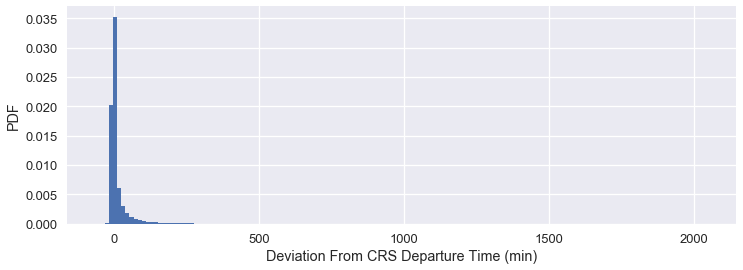

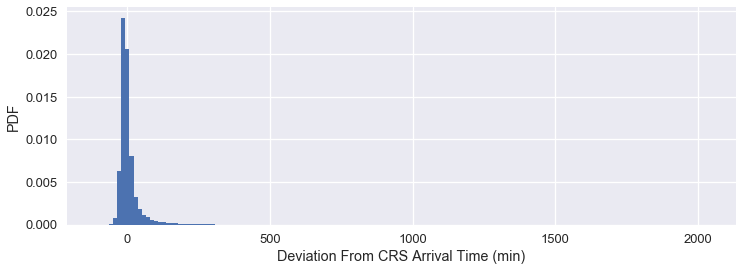

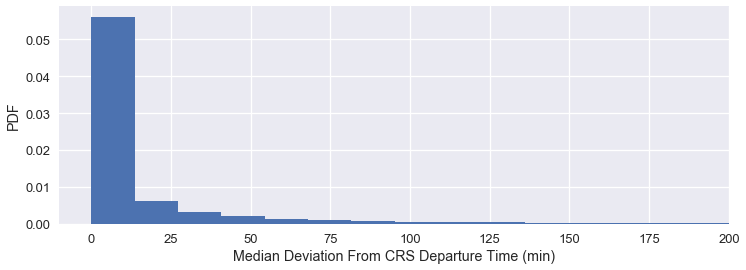

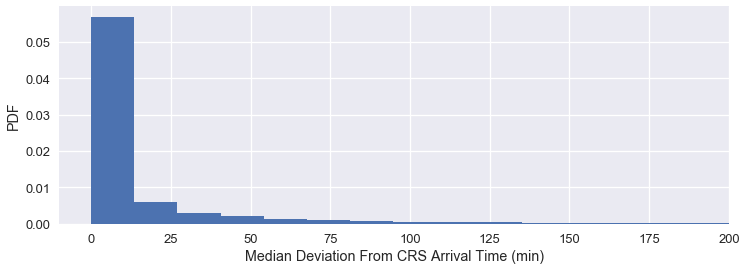

In [4]:
#check sample size 
print('Flights Sample Size: ', len(flights))
print('Links_d Sample Size: ', len(links_d))

#define function to plot probabilty density function
def pdf_plot(series, name):
    fig, ax = plt.subplots(figsize=(12,4))
    ax.hist(series, bins=150, histtype='stepfilled', normed=True)
    ax.set(xlabel=name, ylabel='PDF')
    return ax

#plot pdf for each variable of interest
dep_deviation_pdf = pdf_plot(flights.dep_deviation, 'Deviation From CRS Departure Time (min)')
arr_deviation_pdf = pdf_plot(flights.arr_deviation, 'Deviation From CRS Arrival Time (min)')
dep_delay_pdf = pdf_plot(links_d.dep_delay, 'Median Deviation From CRS Departure Time (min)')
dep_delay_pdf.set(xlim=(-10,200))
arr_delay_pdf = pdf_plot(links_d.arr_delay, 'Median Deviation From CRS Arrival Time (min)')
arr_delay_pdf.set(xlim=(-10,200))

<div class="span5 alert alert-success">
<p>Central Limit Theorem applies as sample size is very large and the probability density function of each variable shows observations are independent</p>
</div>

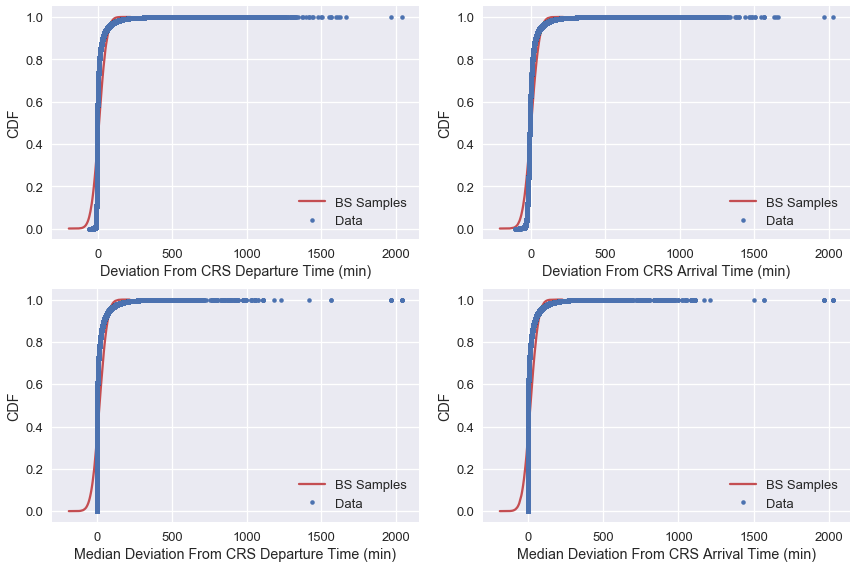

In [21]:
#define function for plotting cdf and ecdf
def cdf_plot(series, name, ax):
    mean = series.mean()
    std = series.std()
    samples = np.random.normal(mean, std, size=len(series))
    def ecdf(data):
        n = len(data)
        x = np.sort(data)
        y = np.arange(1, n+1) / n
        return x, y
    x_theor, y_theor = ecdf(samples)
    x, y = ecdf(series)
    ax.plot(x_theor, y_theor, color='r')
    ax.plot(x, y, marker='.', linestyle='none')
    ax.set(xlabel=name, ylabel='CDF')
    ax.legend(('BS Samples', 'Data'), loc='lower right')

#show cdf and ecdf for variables of interest
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
cdf_plot(flights.dep_deviation, 'Deviation From CRS Departure Time (min)', ax=axes[0,0])
cdf_plot(flights.arr_deviation, 'Deviation From CRS Arrival Time (min)', ax=axes[0,1])
cdf_plot(links_d.dep_delay, 'Median Deviation From CRS Departure Time (min)', ax=axes[1,0])
cdf_plot(links_d.arr_delay, 'Median Deviation From CRS Arrival Time (min)', ax=axes[1,1])
fig.tight_layout()
plt.savefig('Deviation_cdf_plots.png')

<div class="span5 alert alert-success">
<p>The Cumulative Density Function of each variable shows they all possess normal distributions</p>
</div>

### Regression Analysis

<div class="span5 alert alert-info">
For the purpose of validating a directed network approach utilizing only departure delay as a predictor of overall (departure and arrival) delay
</div>

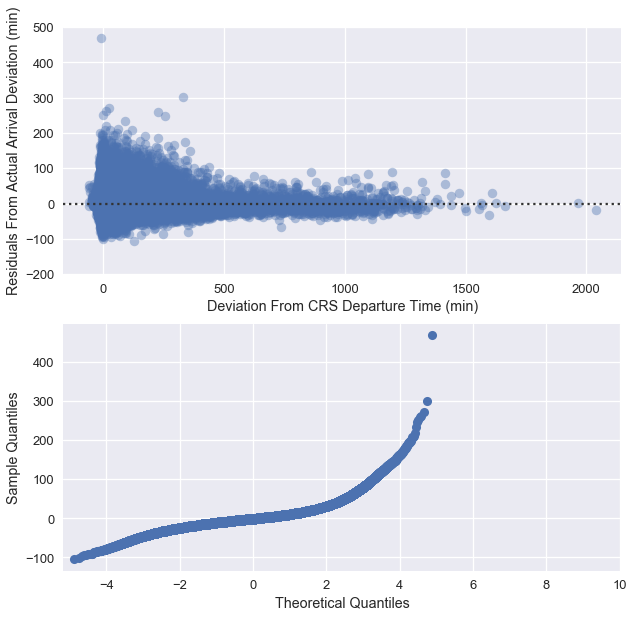

In [32]:
arr_from_dep = ols('arr_deviation ~ dep_deviation', flights).fit()


#plot the residuals and the quantile plot of the regression analysis for departure and arrival deviation
fig, axes = plt.subplots(nrows=2, figsize=(10,10))
sns.residplot(flights.dep_deviation, flights.arr_deviation, ax=axes[0],
              scatter_kws={'alpha':.4, 's': 90})
sm.qqplot(arr_from_dep.resid, ax=axes[1])
axes[0].set(xlabel='Deviation From CRS Departure Time (min)',
       ylabel='Residuals From Actual Arrival Deviation (min)',
       ylim=(-200,500))
plt.savefig('Residuals.png')

<div class="span5 alert alert-success">
<p>The residuals between departure and arrival deviation are in a random pattern, supporting the use of a linear model. The quantile plot shows that the datasets are heavily skewed, and robust methods should be used in model construction to lessen the influence of extreme values.</p>
</div>

Text(0.27,1,'Regression Model for Departure and Arrival Deviation By Date')

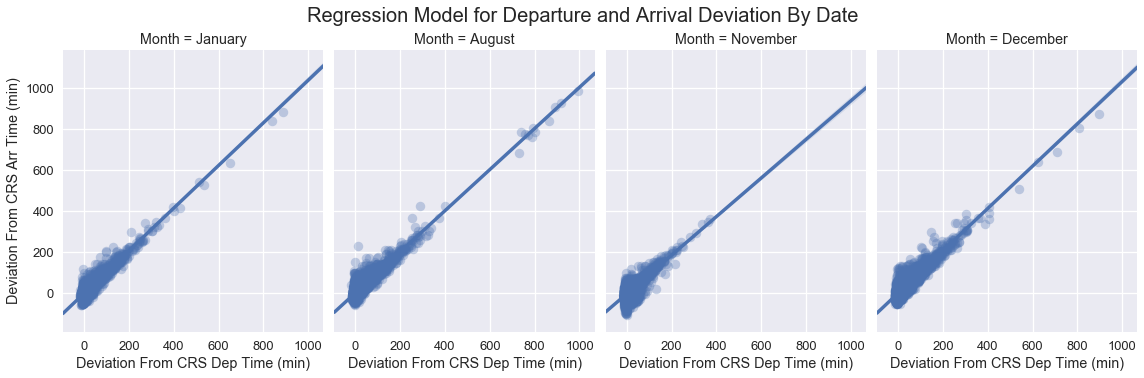

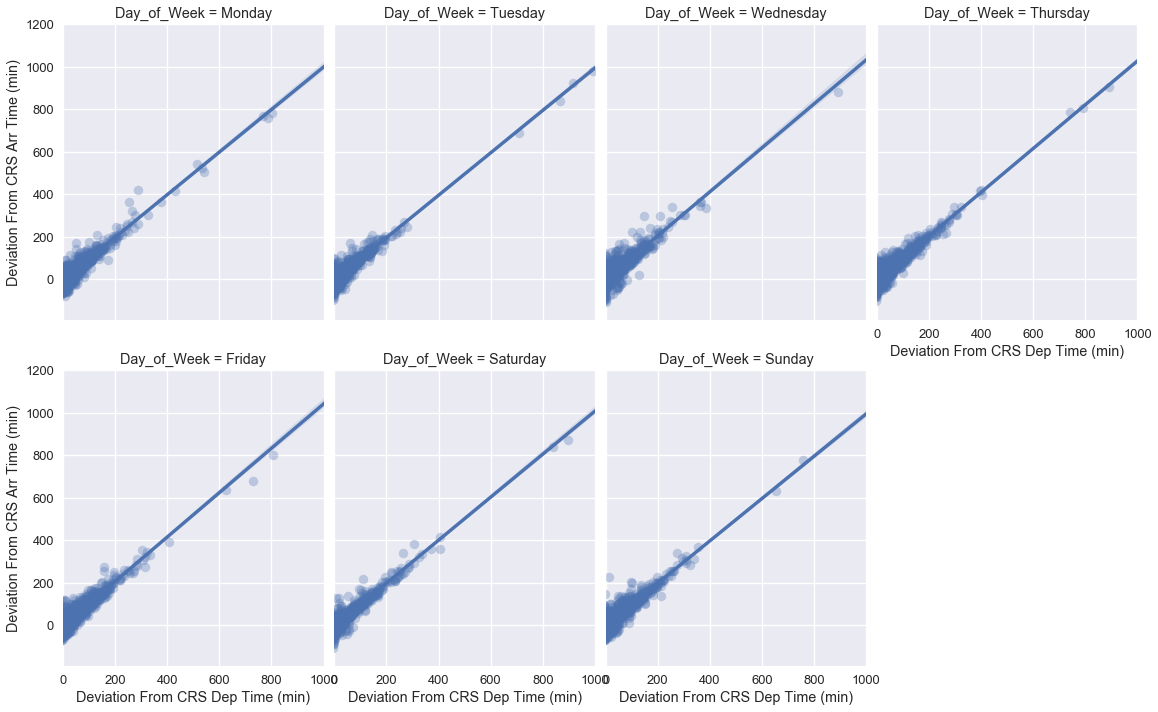

In [7]:
#define function for getting list and dataframe slice of top n values in column
def top_nvals(series, data, size):
    ntop_counts = series.value_counts()
    ntop_lst = ntop_counts.nlargest(size).index.tolist()
    ntop_df = data.loc[series.isin(ntop_counts[:size].index.tolist())]
    return ntop_lst, ntop_df

#unpack dataframe and list of top 5 links
top5_links, top5links_df = top_nvals(flights.link, flights, 5)

#plot dep and arr deviation by month
g1 = sns.lmplot(x='dep_deviation', y='arr_deviation', col='Month', col_wrap=4, aspect=.8,
                col_order=['January', 'August', 'November', 'December'], data=top5links_df,
                palette='Paired', scatter_kws={'alpha': .3, 's': 90})
g1.set_axis_labels('Deviation From CRS Dep Time (min)', 'Deviation From CRS Arr Time (min)')

#plot dep and arr deviation by day of week
g = sns.lmplot(x='dep_deviation', y='arr_deviation', col='Day_of_Week', aspect=.8,
              col_wrap=4, col_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              palette='Paired', data=top5links_df, scatter_kws={'alpha': .3, 's':90})
g.set(xlim=(0,1000))
g.set_axis_labels('Deviation From CRS Dep Time (min)', 'Deviation From CRS Arr Time (min)')
g1.fig.text(0.27, 1, 'Regression Model for Departure and Arrival Deviation By Date', fontsize=20)

<div class="span5 alert alert-success">
<p>A Regression Analysis showed that in each categorical date value, deviation from CRS departure and arrival time shared a positive correlation </p>
</div>

##### Difference of departure and arrival deviation means

<div class="span5 alert alert-info">
<p>**Hypothesis Test**</p>
<p>Ho : $\mu_{d}$ = $\mu_{a}$  </p>
<p>Ha : $\mu_{d}$ $\neq$ $\mu_{a}$ </p>
</div>

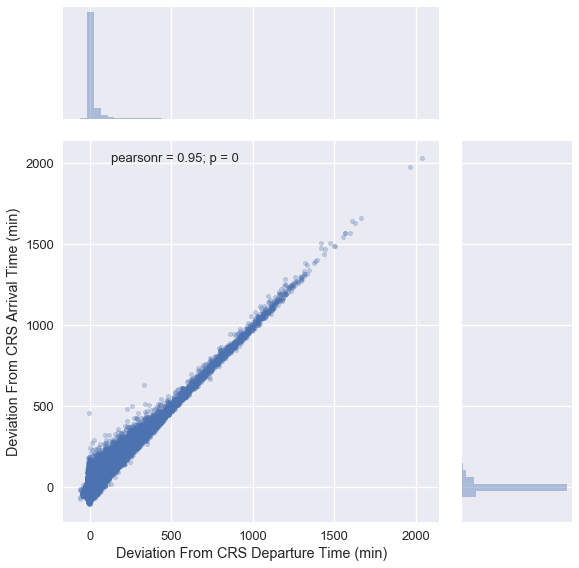

In [19]:
#display distribution and pearsonr for departure and arrival
g = sns.jointplot(x='dep_deviation', y='arr_deviation', data=flights,
                   size=8, ratio=3, kind="scatter", joint_kws={'alpha':0.3,'s': 20})
g.set_axis_labels("Deviation From CRS Departure Time (min)", 
                  "Deviation From CRS Arrival Time (min)")

In [9]:
#define function to calculate an independent samples ttest 
def ttest_of_means(series1, name1, series2, name2):
    sem = round(np.sqrt(((series1.std() ** 2) / len(series1)) + 
                        ((series2.std() ** 2) / len(series2))), 3)
    dom = round(np.abs(np.mean(series1) - np.mean(series2)), 3)
    print('Margin of Error: ', sem)
    print('Difference of Means: ', dom)
    print(name1,' 95% Confidence Interval: ', np.percentile(series1,[2.5, 97.5]), 'min')
    print(name2,' 95% Confidence Interval: ', np.percentile(series2, [2.5, 97.5]), 'min')
    print('T-Test: tstat = %6.3f, P-value = %6.10f' % stats.ttest_ind(series2, series1))

#calculate significance of difference of means for departure and arrival deviation
ttest_of_means(flights.dep_deviation,'Departure Deviation',
               flights.arr_deviation, 'Arrival Deviation')

Margin of Error:  0.045
Difference of Means:  5.549
Departure Deviation  95% Confidence Interval:  [-11. 112.] min
Arrival Deviation  95% Confidence Interval:  [-31. 112.] min
T-Test: tstat = -124.015, P-value = 0.0000000000


<div class="span5 alert alert-success">
<p>With an alpha level of .01 ($\alpha$ = .01), the difference between the means of departure and arrival deviation from scheduled (CRS) time was statistically significant, p < .01</p>
</div>

##### Correlation between median departure delay and median arrival delay for Origin-Destination Pairs

<div class="span5 alert alert-info">
<p>Ho : The correlation between the current median departure delay and median arrival delay for an Origin-Destination pair is not significant</p>
<p>Ha : The correlation between the current median departure delay and median arrival delay for an Origin-Destination pair is significant</p>
</div>

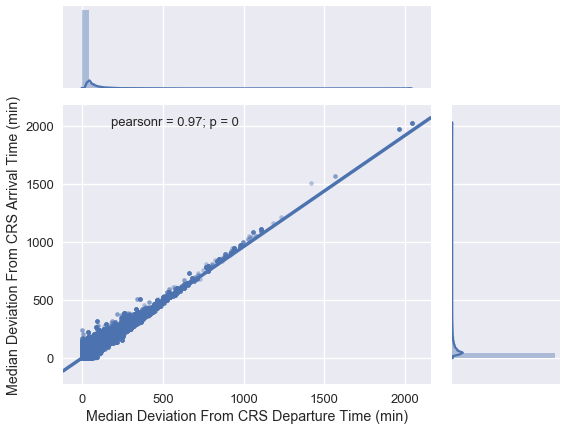

In [33]:
#display distribution and pearsonr for distance and arrival delay
g = sns.jointplot(x='dep_delay', y='arr_delay', data=links_d, size=8,
                  ratio=3, kind='reg', scatter_kws={'alpha':0.4,'s': 20})
g.set_axis_labels('Median Deviation From CRS Departure Time (min)',
                  'Median Deviation From CRS Arrival Time (min)')
plt.gcf().set_size_inches(8, 6)
plt.savefig('Median_arr_vs_dep_deviation.png')

In [11]:
#define function to test for signficance of a correlation
def pearsonr_perm_test(x, y, size):
    pearson_r = np.corrcoef(x,y)[0,1]
    perm_replicates = np.empty(size)
    for i in range(size):
        x_perm = np.random.permutation(x)
        perm_replicates[i] = np.corrcoef(x_perm, y)[0,1]
    p = np.sum(perm_replicates >= pearson_r) / len(perm_replicates)
    return pearson_r, p 

#show correlation coefficient and p-value
print('Pearson Correlation Coefficient: r = %6.3f, P-value = %6.8f' % 
      pearsonr_perm_test(links_d.arr_delay, links_d.dep_delay, 1000))

Pearson Correlation Coefficient: r =  0.971, P-value = 0.00000000


<div class="span5 alert alert-success">
<p>With an alpha level of .01 ($\alpha$ = .01), the correlation between the median departure delay and the median arrival delay for Origin-Destination pairs is statistically significant, p < .01</p>
</div>